In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect
from dotenv import load_dotenv
import os

In [2]:
df = pd.read_csv("../Data/Raws/petroleum.csv", delimiter=',',encoding='unicode_escape')
df.head()

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
0,2024-09-30,R30,PADD 3,EPM0,Total Gasoline,PTE,Retail Sales,EMM_EPM0_PTE_R30_DPG,Gulf Coast All Grades All Formulations Retail ...,2.793,$/GAL
1,2024-09-30,R10,PADD 1,EPD2D,No 2 Diesel,PTE,Retail Sales,EMD_EPD2D_PTE_R10_DPG,East Coast No 2 Diesel Retail Prices (Dollars ...,3.571,$/GAL
2,2024-09-30,R5XCA,PADD 5 EXCEPT CALIFORNIA,EPD2D,No 2 Diesel,PTE,Retail Sales,EMD_EPD2D_PTE_R5XCA_DPG,West Coast (PADD 5) Except California No 2 Die...,3.797,$/GAL
3,2024-09-30,R40,PADD 4,EPMRU,Conventional Regular Gasoline,PTE,Retail Sales,EMM_EPMRU_PTE_R40_DPG,Rocky Mountain Regular Conventional Retail Gas...,3.421,$/GAL
4,2024-09-30,R1X,PADD 1A,EPMRU,Conventional Regular Gasoline,PTE,Retail Sales,EMM_EPMRU_PTE_R1X_DPG,New England (PADD 1A) Regular Conventional Ret...,3.058,$/GAL


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   period              1000 non-null   object 
 1   duoarea             1000 non-null   object 
 2   area-name           1000 non-null   object 
 3   product             1000 non-null   object 
 4   product-name        1000 non-null   object 
 5   process             1000 non-null   object 
 6   process-name        1000 non-null   object 
 7   series              1000 non-null   object 
 8   series-description  1000 non-null   object 
 9   value               988 non-null    float64
 10  units               1000 non-null   object 
dtypes: float64(1), object(10)
memory usage: 86.1+ KB


In [4]:
#Numerical summary (Only value)
numerical_summary = df.describe()
numerical_summary

,value
count,988.000000
mean,3.695623
std,0.563167
min,2.605000
25%,3.239500
50%,3.612000
75%,4.053500
max,5.395000


In [5]:
#Categorical summary
categorical_summary = df.describe(include=['object'])
categorical_summary

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,units
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,29,29,14,14,1,1,310,310,1
top,2024-09-30,R5XCA,PADD 5 EXCEPT CALIFORNIA,EPM0,Total Gasoline,PTE,Retail Sales,EMM_EPM0_PTE_R30_DPG,Gulf Coast All Grades All Formulations Retail ...,$/GAL
freq,310,46,46,97,97,1000,1000,4,4,1000


# Columns
View the value count of each dataframe columm

## Period
Date of the row

In [6]:
df['period'].value_counts()

period
2024-09-30    310
2024-09-23    310
2024-09-16    310
2024-09-09     70
Name: count, dtype: int64

Only four periods available, in this case, 310 rows for all cases except 2024-09-09. This column is considered an object, so a transformation to date is necessary.

## Duoarea and Area-name
Related columns about location

In [7]:
df['duoarea'].value_counts()

duoarea
R5XCA    46
R40      46
R20      46
R30      45
R1Z      45
R50      45
NUS      44
R1Y      44
R1X      44
R10      42
STX      39
SCO      38
YDEN     38
SNY      38
SCA      32
YMIA     28
Y35NY    28
Y05SF    28
YCLE     28
Y48SE    27
YORD     27
Y44HO    27
SMN      26
Y05LA    26
SMA      25
SFL      25
SWA      25
YBOS     24
SOH      24
Name: count, dtype: int64

For duoarea, it seems that these are codes representing the zone.

The code "R5XCA" has an associated value of 46, which matches the area "PADD 5 EXCEPT CALIFORNIA" in the "area-name" column.
Some possibilities we can think of to decipher this (or make sense of it) are: 
- R5 = PADD 5 
- X = EXCEPT, 
- CA = CALIFORNIA

This pattern repeats with other codes and their respective area names.
For example:
R50 = 45 <-> PADD 5 = 45

In [8]:
df['area-name'].value_counts()

area-name
PADD 5 EXCEPT CALIFORNIA    46
PADD 4                      46
PADD 2                      46
PADD 3                      45
PADD 1C                     45
PADD 5                      45
U.S.                        44
PADD 1B                     44
PADD 1A                     44
PADD 1                      42
TEXAS                       39
COLORADO                    38
DENVER                      38
NEW YORK                    38
CALIFORNIA                  32
MIAMI                       28
NEW YORK CITY               28
SAN FRANCISCO               28
CLEVELAND                   28
SEATTLE                     27
CHICAGO                     27
HOUSTON                     27
MINNESOTA                   26
LOS ANGELES                 26
MASSACHUSETTS               25
FLORIDA                     25
WASHINGTON                  25
BOSTON                      24
OHIO                        24
Name: count, dtype: int64

## Considerations for this column:

### 1. PADD (Petroleum Administration for Defense Districts):
**Description**: PADDs are geographical divisions used by the U.S. Energy Information Administration (EIA) to track petroleum supply and distribution data. These areas were originally created during World War II to coordinate petroleum supply.

**PADD 1, 1A, 1B, 1C**: PADD 1 covers the East Coast of the U.S. and is subdivided into 3 areas:
- **PADD 1A**: New England (Maine, Vermont, New Hampshire, Massachusetts, Connecticut, Rhode Island).
- **PADD 1B**: Central Atlantic (New York, New Jersey, Pennsylvania, Delaware, Maryland, Washington D.C.).
- **PADD 1C**: Southeast (Virginia, North Carolina, South Carolina, Georgia, Florida).

**Other PADDs**:
- **PADD 2**: Midwest (from Ohio to North Dakota).
- **PADD 3**: Gulf Coast (Texas, Louisiana, Mississippi, Alabama, New Mexico).
- **PADD 4**: Mountain (from Wyoming to Montana, including Colorado).
- **PADD 5**: West Coast (California, Nevada, Oregon, Washington, Alaska, Hawaii).
- **PADD 5 EXCEPT CALIFORNIA**: This specifically excludes California from PADD 5.

### 2. States and Cities (Texas, New York, Denver, etc.):
**Description**: Some of the mentioned areas are individual states, such as TEXAS, COLORADO, MINNESOTA, or OHIO, while others are specific cities, like DENVER, LOS ANGELES, CHICAGO, and HOUSTON.

**Differences between cities and states**: For example:
- New York refers to the state of New York, while New York City is the specific city within that state.
- This is similar for other combinations like SAN FRANCISCO (city) and CALIFORNIA (state).


### 3. U.S. value:
**Description**: The value "U.S." refers generally to all states. In other words, it means the record for the entire United States.


## Transformation suggested:
Since this information its repeated and clearer in "area-name," we could consider removing this column and adding a new 'area' column to generalyze if the area is a city, state or region.


## Product and Product-name

In [9]:
df['product'].value_counts()

product
EPM0        97
EPMM        96
EPMP        94
EPMR        91
EPMMR       75
EPMRR       74
EPM0R       73
EPMMU       69
EPMPR       68
EPMPU       66
EPM0U       66
EPMRU       64
EPD2DXL0    34
EPD2D       33
Name: count, dtype: int64

In [10]:
df['product-name'].value_counts()

product-name
Total Gasoline                       97
Midgrade Gasoline                    96
Premium Gasoline                     94
Regular Gasoline                     91
Gasoline Reformulated Midgrade       75
Reformulated Regular Gasoline        74
Reformulated Motor Gasoline          73
Gasoline Conventional Midgrade       69
Reformulated Premium Gasoline        68
Conventional Premium Gasoline        66
Conventional Gasoline (No Oxy)       66
Conventional Regular Gasoline        64
No 2 Diesel Low Sulfur (0-15 ppm)    34
No 2 Diesel                          33
Name: count, dtype: int64

Similar to duoarea and area, I propose some transformations in this case:

Since product codes repeat the information (just encoded) from product-name, all codes referring to gasoline should be replaced with "Gasoline" and the codes referring to diesel shoul be replaced with "Diesel" to be like a general way to know what type of product is.

## Process

In [11]:
df['process'].value_counts()

process
PTE    1000
Name: count, dtype: int64

In [12]:
df['process-name'].value_counts()

process-name
Retail Sales    1000
Name: count, dtype: int64

Unique value in each column, because the API call requested information on retail petroleum sales. The API contains information related to electricity and other fuel sources, so it would be important to keep the column in case we expand in the future to also seek data on other fuels.

## Series

In [13]:
df['series'].value_counts()

series
EMM_EPM0_PTE_R30_DPG      4
EMM_EPMMR_PTE_R40_DPG     4
EMM_EPM0R_PTE_NUS_DPG     4
EMM_EPM0U_PTE_SWA_DPG     4
EMM_EPMM_PTE_Y35NY_DPG    4
                         ..
EMM_EPMMR_PTE_R10_DPG     3
EMM_EPM0R_PTE_R1Z_DPG     3
EMM_EPMM_PTE_Y05LA_DPG    3
EMM_EPMM_PTE_R1Y_DPG      3
EMM_EPM0_PTE_SFL_DPG      3
Name: count, Length: 310, dtype: int64

In [14]:
df['series-description'].value_counts()

series-description
Gulf Coast All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)                  4
Rocky Mountain Midgrade Reformulated Retail Gasoline Prices (Dollars per Gallon)                    4
U.S. All Grades Reformulated Retail Gasoline Prices (Dollars per Gallon)                            4
Washington All Grades Conventional Retail Gasoline Prices (Dollars per Gallon)                      4
New York City Midgrade All Formulations Retail Gasoline Prices (Dollars per Gallon)                 4
                                                                                                   ..
East Coast Midgrade Reformulated Retail Gasoline Prices (Dollars per Gallon)                        3
Lower Atlantic (PADD 1C) All Grades Reformulated Retail Gasoline Prices (Dollars per Gallon)        3
Los Angeles Midgrade All Formulations Retail Gasoline Prices (Dollars per Gallon)                   3
Central Atlantic (PADD 1B) Midgrade All Formulations Retail Gas

"Series" is also a coding, in this case, for Series-name. We found that this column accurately groups what each record represents, combining information on area, product, and units. Series, like the other coded columns, is redundant and we can either remove it or assign it a different use.

## Prices

In [15]:
df['value'].value_counts()

value
3.118    7
3.844    6
3.105    5
3.783    5
3.093    5
        ..
3.386    1
3.312    1
3.027    1
2.790    1
2.877    1
Name: count, Length: 589, dtype: int64

In [16]:
df['units'].value_counts()

units
$/GAL    1000
Name: count, dtype: int64

We already know that it refers to Dollars per gallon, so we could eliminate the units column and rename the value column to something like "Value ($/GAL)" to indicate that it represents dollars per gallon. However, if we were to merge this with sources outside of the USA, it would be important to keep the column.

# Transformations
Lets start the transformations according what we find in the analysis

### Drop / Rename columns

In [17]:
#Drop columns
drop_columns = ['duoarea', 'units', 'series']  
df = df.drop(columns=drop_columns)

#Rename columns (value)
df = df.rename(columns={'value': 'value($/GAL)'})

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   period              1000 non-null   object 
 1   area-name           1000 non-null   object 
 2   product             1000 non-null   object 
 3   product-name        1000 non-null   object 
 4   process             1000 non-null   object 
 5   process-name        1000 non-null   object 
 6   series-description  1000 non-null   object 
 7   value($/GAL)        988 non-null    float64
dtypes: float64(1), object(7)
memory usage: 62.6+ KB
None


### Formats

In [18]:
#Correct the types:
df['period'] = pd.to_datetime(df['period'], format='%Y-%m-%d') #Object to date
df = df.astype({col: 'string' for col in df.select_dtypes(include='object').columns}) #Object to string

#We check the changes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   period              1000 non-null   datetime64[ns]
 1   area-name           1000 non-null   string        
 2   product             1000 non-null   string        
 3   product-name        1000 non-null   string        
 4   process             1000 non-null   string        
 5   process-name        1000 non-null   string        
 6   series-description  1000 non-null   string        
 7   value($/GAL)        988 non-null    float64       
dtypes: datetime64[ns](1), float64(1), string(6)
memory usage: 62.6 KB
None


# Cleaning / Replace values
Period, product-name, process, process-name, series-name y value doesnt need replaces or cleaning

## Area-name

In [19]:
replaces = {
    'PADD 5 EXCEPT CALIFORNIA': 'West Coast (except California)','PADD 4': 'Rocky Mountain',
    'PADD 2': 'Midwest','PADD 5': 'West Coast','PADD 3': 'Gulf Coast','PADD 1C': 'East Coast (Central)',
    'PADD 1B': 'East Coast (North)','PADD 1A': 'East Coast (South)','PADD 1': 'East Coast'
} #Create a dictionary to replace the PADD values to a more explicit name
df['area-name'] = df['area-name'].replace(replaces) #Replaces

## New Area column

In [20]:
#Make a list for the codes to know if an area is city/state/region
city_list = ['DENVER', 'NEW YORK CITY', 'SAN FRANCISCO', 'MIAMI', 'CLEVELAND', 
              'CHICAGO', 'SEATTLE', 'HOUSTON', 'LOS ANGELES', 'BOSTON']

state_list = ['TEXAS', 'NEW YORK', 'COLORADO', 'CALIFORNIA', 'MINNESOTA', 'FLORIDA', 'MASSACHUSETTS', 
               'WASHINGTON', 'OHIO']

region_list = ['West Coast (except California)', 'Rocky Mountain', 'Midwest', 'West Coast', 
               'Gulf Coast', 'East Coast (Central)', 'East Coast (North)', 'U.S.', 
               'East Coast (South)', 'East Coast']

#Create the column 'area' based in 'area-name' values (If they are reffering to a city/state/region)
df['area'] = np.where(df['area-name'].isin(city_list), 'City',
               np.where(df['area-name'].isin(state_list), 'State', 
               np.where(df['area-name'].isin(region_list), 'Region', df['area-name'])))

In [21]:
df['area-name'].value_counts()

area-name
West Coast (except California)    46
Rocky Mountain                    46
Midwest                           46
Gulf Coast                        45
East Coast (Central)              45
West Coast                        45
U.S.                              44
East Coast (North)                44
East Coast (South)                44
East Coast                        42
TEXAS                             39
COLORADO                          38
DENVER                            38
NEW YORK                          38
CALIFORNIA                        32
MIAMI                             28
NEW YORK CITY                     28
SAN FRANCISCO                     28
CLEVELAND                         28
SEATTLE                           27
CHICAGO                           27
HOUSTON                           27
MINNESOTA                         26
LOS ANGELES                       26
MASSACHUSETTS                     25
FLORIDA                           25
WASHINGTON                  

In [22]:
df['area'].value_counts()

area
Region    447
City      281
State     272
Name: count, dtype: int64

The PADDs (now replaced by other names) fully cover all 50 states of the USA...

**PADD 1 (East Coast)**:
- **East Coast (South)**: includes states such as Florida, Georgia, North Carolina, and South Carolina.
- **East Coast (Central)**: includes Mid-Atlantic states like New York, New Jersey, and Pennsylvania.
- **East Coast (North)**: includes states from New England such as Maine, Vermont, Massachusetts, etc.

Therefore, PADD 1 covers states from the Northeast, Mid-Atlantic, and Southeast.

**PADD 2 (Midwest)**: includes states from the Midwest such as Illinois, Ohio, Michigan, Indiana, Wisconsin, Minnesota, and others.

**PADD 3 (Gulf Coast)**: includes Gulf Coast states such as Texas, Louisiana, Mississippi, Alabama.

**PADD 4 (Rocky Mountain)**: includes mountainous states such as Colorado, Utah, Wyoming, Montana, Idaho.

**PADD 5 (West Coast)**: includes the West Coast states such as California, Oregon, Washington.
- **PADD 5 EXCEPT CALIFORNIA**: is the same region but excludes California and may include Oregon and Washington.


## Product
We will change this column to use it solely to define which product it refers to (in this case, gasoline or diesel).

In [23]:
#Make a list for the codes to gasoline/diesel
gasoline_codes = ['EPM0', 'EPMM', 'EPMP', 'EPMR', 'EPMMR', 'EPMRR', 'EPM0R', 'EPMMU', 'EPMPR','EPMPU', 'EPM0U', 'EPMRU']
diesel_codes = ['EPD2DXL0', 'EPD2D']

#Replaces
df['product'] = np.where(df['product'].isin(gasoline_codes), 'Gasoline', 
                np.where(df['product'].isin(diesel_codes), 'Diesel', df['product']))

In [24]:
print(df['product-name'].value_counts())

product-name
Total Gasoline                       97
Midgrade Gasoline                    96
Premium Gasoline                     94
Regular Gasoline                     91
Gasoline Reformulated Midgrade       75
Reformulated Regular Gasoline        74
Reformulated Motor Gasoline          73
Gasoline Conventional Midgrade       69
Reformulated Premium Gasoline        68
Conventional Premium Gasoline        66
Conventional Gasoline (No Oxy)       66
Conventional Regular Gasoline        64
No 2 Diesel Low Sulfur (0-15 ppm)    34
No 2 Diesel                          33
Name: count, dtype: Int64


In [25]:
print(df['product'].value_counts())

product
Gasoline    933
Diesel       67
Name: count, dtype: int64


## Nulls cleaning
Value has some nulls, so we will delete those rows.

In [26]:
df.dropna(subset=['value($/GAL)'], inplace=True) #No nulls

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 988 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   period              988 non-null    datetime64[ns]
 1   area-name           988 non-null    string        
 2   product             988 non-null    object        
 3   product-name        988 non-null    string        
 4   process             988 non-null    string        
 5   process-name        988 non-null    string        
 6   series-description  988 non-null    string        
 7   value($/GAL)        988 non-null    float64       
 8   area                988 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2), string(5)
memory usage: 77.2+ KB


We save it as a CSV.

In [28]:
df.to_csv('../Data/Clean/petroleum_clean.csv', index=False)

We upload it to the database.

In [34]:
load_dotenv()

localhost = os.getenv('LOCALHOST')
port = os.getenv('PORT')
nameDB = os.getenv('DB_NAME')
userDB = os.getenv('DB_USER')
passDB = os.getenv('DB_PASS')

  
clean_table_database =  "api_petroleum"

engine = create_engine(f'postgresql+psycopg2://{userDB}:{passDB}@{localhost}:{port}/{nameDB}')

try:
    df.to_sql(clean_table_database, engine, if_exists='replace', index=False)
    print(f"Tabla '{clean_table_database}' actualizada correctamente.")

except Exception as e:
    print(f"Error al subir los datos: {e}")

finally:
    engine.dispose()

Tabla 'api_petroleum' actualizada correctamente.


# Visualizations 

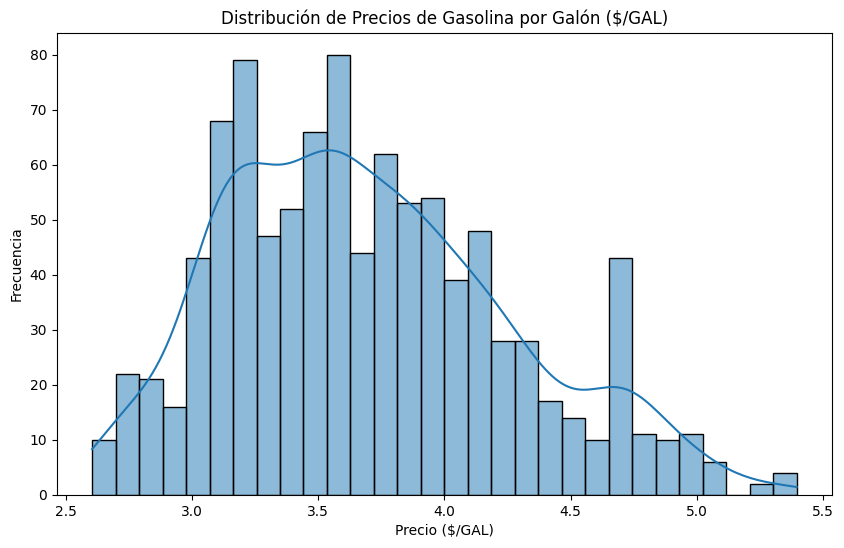

In [8]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['value($/GAL)'], bins=30, kde=True)
plt.title('Distribución de Precios de Gasolina por Galón ($/GAL)')
plt.xlabel('Precio ($/GAL)')
plt.ylabel('Frecuencia')
plt.show()

/tmp/ipykernel_4591/3769719736.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='area-name', y='value($/GAL)', data=df, ci=None)


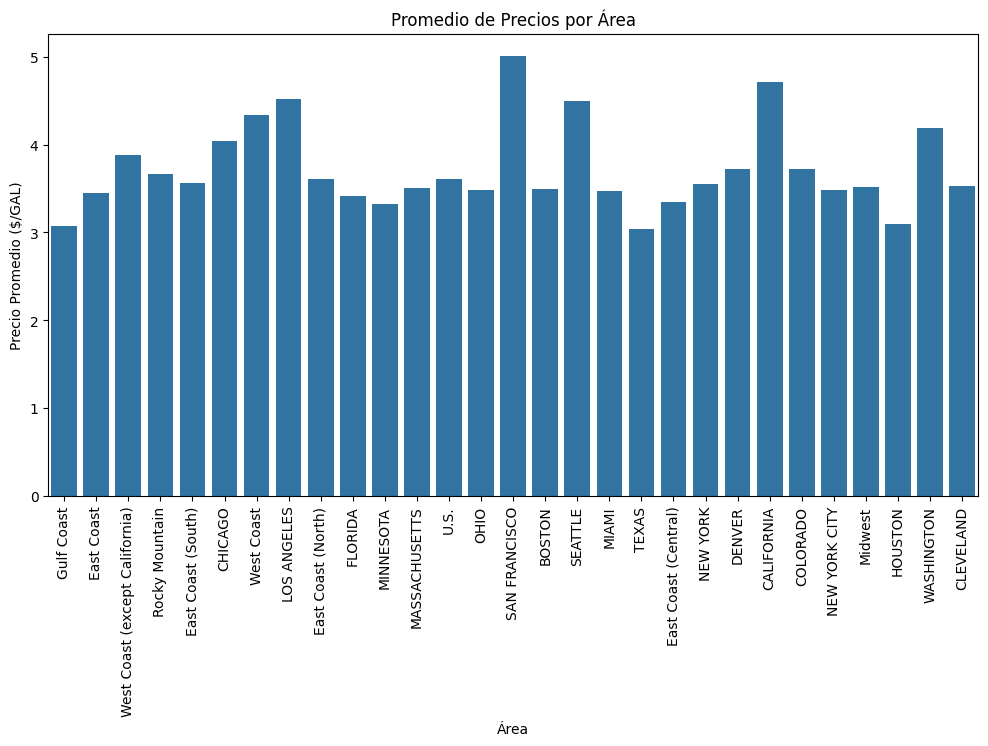

In [13]:
plt.figure(figsize=(12,6))
sns.barplot(x='area-name', y='value($/GAL)', data=df, ci=None)
plt.xticks(rotation=90)
plt.title('Promedio de Precios por Área')
plt.xlabel('Área')
plt.ylabel('Precio Promedio ($/GAL)')
plt.show()
